In [1]:
%pylab inline 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import random 

Populating the interactive namespace from numpy and matplotlib


### What would one's decision have to do with anothers. We're each still 50% likely to get it right?
### Would any method of each guessing different numbers work?


In [25]:
def test_random(x):
    total = []
    for trial in range(x):
        boxes = array(random.sample(range(100), 100))
        cnt = 0 
        for i in range(0,100):
            choose = array(random.sample(range(50), 50))
            if i not in boxes[choose]:
                #print('FAIL')
                total.append(cnt)
                break
            else:
                cnt +=1
        if cnt ==100: 
            total.append(cnt)
            #print(i)
    return total

In [26]:
def test_control(x):
    control = []
    for trial in range(x):
        cnt = 0 
        for i in range(0,100):
            new = randint(0,2)
            if new!=1:
                control.append(cnt)
                break
            else:
                cnt+=1
        if cnt ==100: 
            control.append(cnt)
    return control 

In [27]:
random_choices = test_random(100000)
control = test_random(100000)
mean(random_choices), mean(control)

(0.97954, 0.9776)

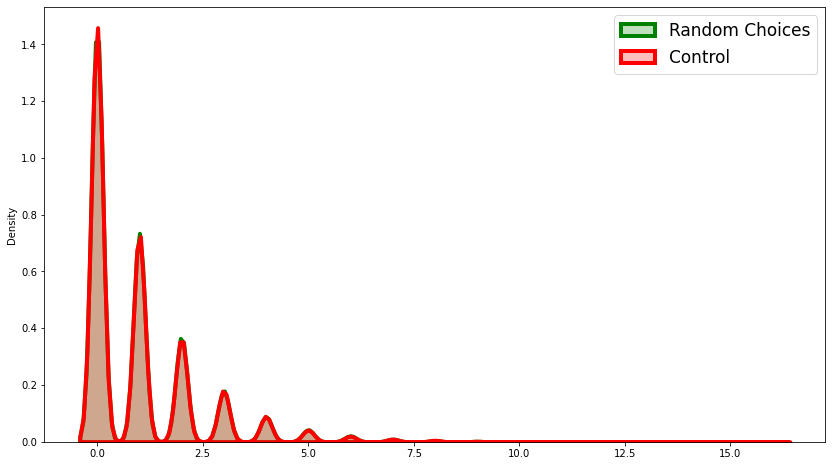

In [34]:
plt.figure(figsize=(14,8))
sns.distplot(random_choices, hist=False, kde=True, 
             bins=int(180/5), color = ['green'], 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4, 'shade':True}, label ='Random Choices')
sns.distplot(control, hist=False, kde=True, 
             bins=int(180/5), color = ['red'], 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4, 'shade':True}, label ='Control')
plt.legend(fontsize = 17)

In [37]:
def correct_choice(x):
    total = []
    for trial in range(x):
        boxes = array(random.sample(range(100), 100))
        cnt = 0 
        for i in range(0,100):
            choose = []
            guess1 = i 
            for guess in range(50):
                choose.append(boxes[guess1])
                guess1 = boxes[guess1]

            if i not in choose:
                total.append(cnt)
                break
            else:
                cnt +=1
        if cnt ==100: 
            total.append(cnt)
    return total

In [39]:
correct_choices = correct_choice(100000)
correct_choices.count(100)/100000

0.30925

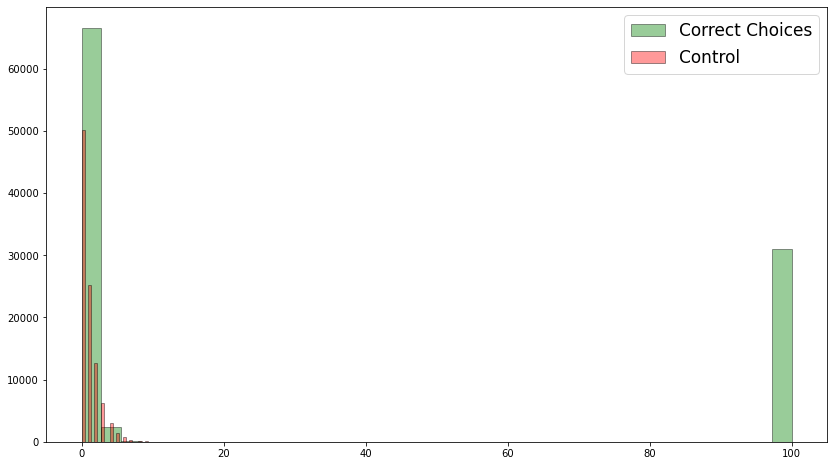

In [41]:
plt.figure(figsize=(14,8))
sns.distplot(correct_choices, hist=True, kde=False, 
             bins=int(180/5), color = ['green'], 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4, 'shade':True}, label ='Correct Choices')
sns.distplot(control, hist=True, kde=False, 
             bins=int(180/5), color = ['red'], 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4, 'shade':True}, label ='Control')
plt.legend(fontsize =17)

Two observations: 
1. This method does not increase the likelihood of getting 50, 60 or 70

In [52]:
#What happens when prisoner n starts by choosing box n+1 instead of n
total = []
for trial in range(100000):
    boxes = array(random.sample(range(100), 100))
    cnt = 0 
    for i in range(0,100):
        choose = []
        if i!=99:
            guess1 = i +1
        else: 
            guess1=0
        for guess in range(50):
            choose.append(boxes[guess1])
            guess1 = boxes[guess1]
            
        if i not in choose:
            #print('FAIL')
            total.append(cnt)
            break
        else:
            cnt +=1
    if cnt ==100: 
        total.append(cnt)

In [55]:
#worse than control. Something wrong 
mean(total), mean(control)

(0.69377, 0.9776)

0.9776